In [1]:
from Modules.classes import * 
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt

In [4]:
H = Hamiltonian(dim = 20) # define random hamiltonian
dt = np.abs(H.energies.min()) / 100 # dt value much smaller than lower energy in the system
t_f = 10 # time of integration

In [5]:
cmap_name = 'hsv'# "coolwarm" # color of nodes
#state_v = np.random.choice(np.linspace(0, 1, 1000), size = H.dim) # initialize random vector
state_v = np.zeros(H.dim, complex)
state_v[0] = 1
state_v = state_v / np.linalg.norm(state_v) # normalize initial vector
state = State(state_v, H, networkx = True, col_map_nodes = cmap_name) # construct state object

states = state.propagate(H, dt = dt, t_final = t_f, networkx = True, sim_tol = 0, col_map_nodes = cmap_name) # propagating intial state

Propagating: 100%|███████████████████████████| 531/531 [00:01<00:00, 489.47it/s]


/tmp/ipykernel_364310/2062959220.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ani.save('movie.gif', writer = writergif)
/home/francesco/miniconda3/envs/main/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


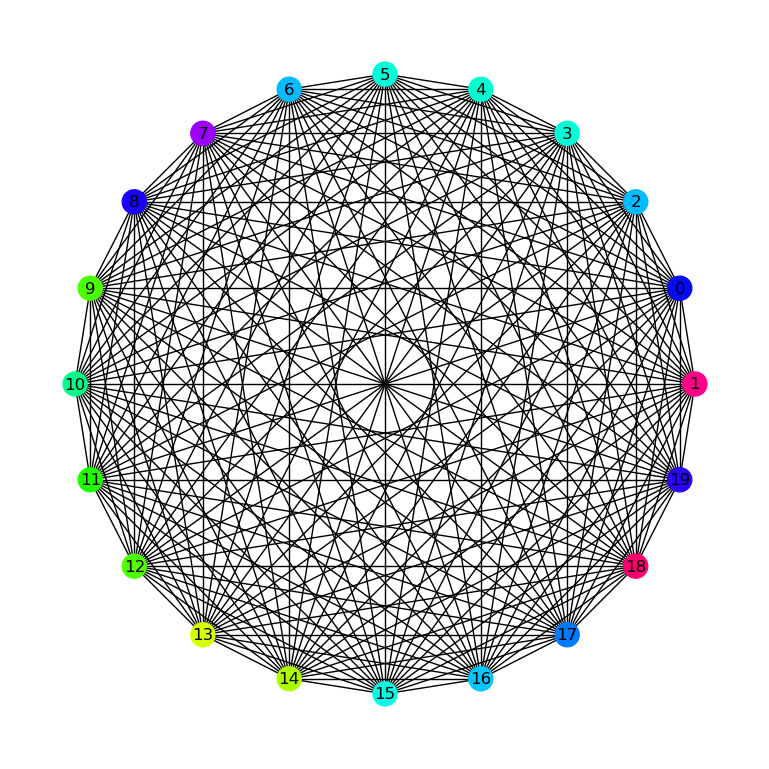

In [8]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

G = states[0].graph
                 
nx.draw_circular(G, with_labels=True, node_color = [G.nodes[i]["color"] for i in range(len(G.nodes))])
def animate(frame):
   fig.clear()
   G = states[frame].graph
   anim = nx.draw_circular(G, with_labels=True, node_color = [G.nodes[i]["color"] for i in range(len(G.nodes))])

ani = FuncAnimation(fig, animate, frames=len(states), interval=100, repeat=False)
writergif = PillowWriter(fps=60)
ani.save('movie.gif', writer = writergif) 
plt.show()